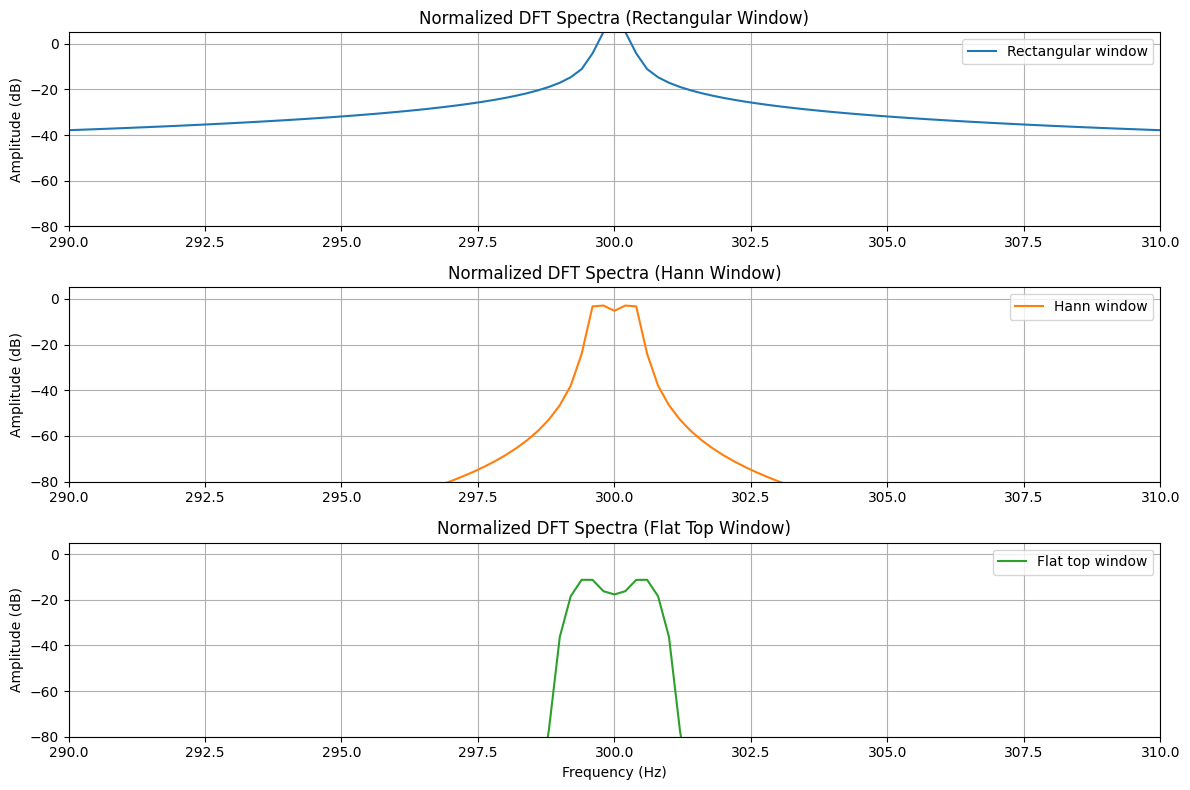

C:\Users\PC COMPUTER\AppData\Local\Temp\ipykernel_11736\2787481176.py:47: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)  # convert to dB


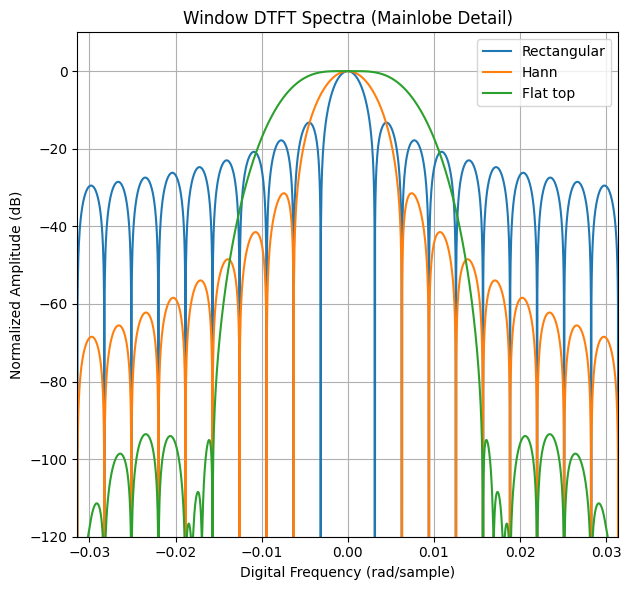

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# Given parameters
f1 = 300      # Hz
f2 = 300.25    # Hz
f3 = 299.75    # Hz
fs = 400       # Hz
N = 2000       # number of samples
amplitude = 2  # maximum amplitude

# Generate time indices
k = np.arange(N)

# Generate the three sine signals
x1 = amplitude * np.sin(2 * np.pi * f1 / fs * k)
x2 = amplitude * np.sin(2 * np.pi * f2 / fs * k)
x3 = amplitude * np.sin(2 * np.pi * f3 / fs * k)

# Combine all three signals
x = x1 + x2 + x3

# Generate windows
w_rect = np.ones(N)  # rectangular window
w_hann = hann(N, sym=False)  # Hann window
w_flattop = flattop(N, sym=False)  # Flat top window

# Function to compute normalized DFT in dB
def fft2db(X):
    N = X.size
    Xtmp = 2/N * X  # normalize for sine amplitudes
    Xtmp[0] *= 1/2  # DC component correction
    if N % 2 == 0:  # Nyquist frequency correction
        Xtmp[N//2] = Xtmp[N//2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # convert to dB

# Function to compute window DTFT
def winDTFTdB(w):
    N = w.size
    Nz = 100 * N  # zero-padding for higher resolution
    W = np.zeros(Nz)
    W[0:N] = w
    W = np.abs(fftshift(fft(W)))  # FFT and shift
    W /= np.max(W)  # normalize to maximum
    W = 20 * np.log10(W)  # convert to dB
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # digital frequencies
    return Omega, W

# Frequency vector for DFT
df = fs / N
f = np.arange(N) * df

# Apply windows and compute DFTs
X_rect = fft(x * w_rect)
X_hann = fft(x * w_hann)
X_flattop = fft(x * w_flattop)

# Plot 1: Normalized DFT spectra
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X_rect), 'C0', label='Rectangular window')
plt.xlim(290, 310)
plt.ylim(-80, 5)
plt.title('Normalized DFT Spectra (Rectangular Window)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X_hann), 'C1', label='Hann window')
plt.xlim(290, 310)
plt.ylim(-80, 5)
plt.title('Normalized DFT Spectra (Hann Window)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X_flattop), 'C2', label='Flat top window')
plt.xlim(290, 310)
plt.ylim(-80, 5)
plt.title('Normalized DFT Spectra (Flat Top Window)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Plot 2: Window DTFT spectra normalized to mainlobe maximum
plt.figure(figsize=(12, 6))

# Compute DTFTs
Omega_rect, W_rect = winDTFTdB(w_rect)
Omega_hann, W_hann = winDTFTdB(w_hann)
Omega_flattop, W_flattop = winDTFTdB(w_flattop)

# Zoomed-in view around mainlobe
plt.subplot(1, 2, 2)
plt.plot(Omega_rect, W_rect, 'C0', label='Rectangular')
plt.plot(Omega_hann, W_hann, 'C1', label='Hann')
plt.plot(Omega_flattop, W_flattop, 'C2', label='Flat top')
plt.xlim(-np.pi/100, np.pi/100)
plt.ylim(-120, 10)
plt.title('Window DTFT Spectra (Mainlobe Detail)')
plt.xlabel('Digital Frequency (rad/sample)')
plt.ylabel('Normalized Amplitude (dB)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()